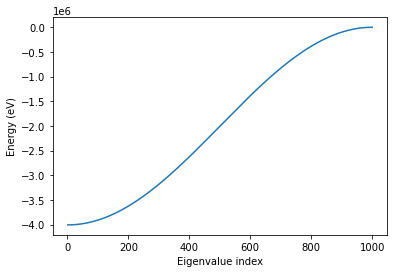

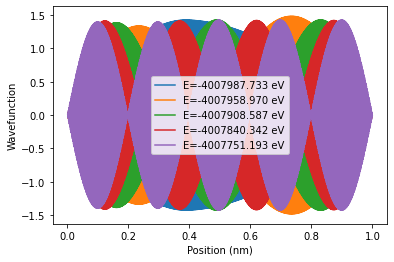

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential energy function V
def V(x, a, b, V0):
    if x < 0 or x > b:
        return np.inf
    elif x < a:
        return 0
    else:
        return V0

# Set up the grid
N = 1000
x = np.linspace(0, 1, N+2)[1:-1]   # exclude endpoints
dx = x[1] - x[0]

# Define the Hamiltonian matrix,H
H = np.zeros((N, N))
for i in range(N):
    H[i,i] = -2/dx**2 + V(x[i], a, b, V0)
    if i > 0:
        H[i,i-1] = 1/dx**2
    if i < N-1:
        H[i,i+1] = 1/dx**2

# Solve for the eigenvalues and eigenvectors
E, psi = np.linalg.eigh(H)

# Normalize the wavefunctions
for i in range(N):
    psi[:,i] /= np.sqrt(dx * np.sum(psi[:,i]**2))

# Plot the energy eigenvalues
plt.figure()
plt.plot(np.arange(1, N+1), E)
plt.xlabel('Eigenvalue index')
plt.ylabel('Energy (eV)')

# Plot the wavefunctions
plt.figure()
for i in range(5):
    plt.plot(x, psi[:,i], label=f'E={E[i]:.3f} eV')
plt.xlabel('Position (nm)')
plt.ylabel('Wavefunction')
plt.legend()
plt.show()